<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Letter_Data_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/letterdata.csv')

In [3]:
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
df.shape

(20000, 17)

### Split Data

In [7]:
X = np.array(df)[:,1:16]
y = np.array(df['letter'])

In [8]:
X

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [9]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [28]:
X_train = X[0:16000, 0:17]
X_test = X[16000:, :]
y_train = y[:16000]
y_test = y[16000:]

In [30]:
y_train.shape

(16000,)

## Building SVM Model

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC(C=3)

In [31]:
model.fit(X_train, y_train)

SVC(C=3)

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn. metrics import accuracy_score, classification_report

In [34]:
accuracy_score(y_test, y_pred)

0.92725

In [35]:
model.score(X_test, y_test)

0.92725

In [38]:
y_grid = pd.DataFrame(np.column_stack([y_test, y_pred]), columns=['y_test','y_pred'])

In [39]:
y_grid

,y_test,y_pred
0,U,U
1,N,N
2,V,V
3,I,I
4,N,N
...,...,...
3995,D,D
3996,C,C
3997,T,T
3998,S,S


### Creating Letters

In [46]:
import string

lab = list(string.ascii_uppercase)

In [49]:
plab = ['Predicted ' + s for s in lab]

In [50]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])

In [55]:
df_cm

,Predicted A,Predicted B,Predicted C,Predicted D,Predicted E,Predicted F,Predicted G,Predicted H,Predicted I,Predicted J,...,Predicted Q,Predicted R,Predicted S,Predicted T,Predicted U,Predicted V,Predicted W,Predicted X,Predicted Y,Predicted Z
A,144,2,0,0,0,0,3,0,0,0,...,0,1,3,0,0,0,0,0,3,0
B,0,127,0,0,0,0,0,0,0,0,...,0,7,2,0,0,0,0,0,0,0
C,0,0,134,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
D,0,7,0,154,0,0,0,2,0,0,...,0,3,0,0,0,0,0,0,0,0
E,0,0,3,1,136,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,3
F,0,1,0,0,2,143,0,1,0,0,...,0,0,0,3,0,0,0,0,0,0
G,0,0,1,2,0,1,150,1,0,0,...,3,2,1,0,0,0,1,0,0,0
H,0,1,0,7,1,1,2,128,0,1,...,0,6,0,0,2,0,0,0,0,0
I,0,0,0,2,0,4,0,0,152,5,...,0,0,0,0,0,0,0,0,0,1
J,0,1,0,2,0,0,0,0,5,138,...,0,0,0,0,0,0,0,0,0,1


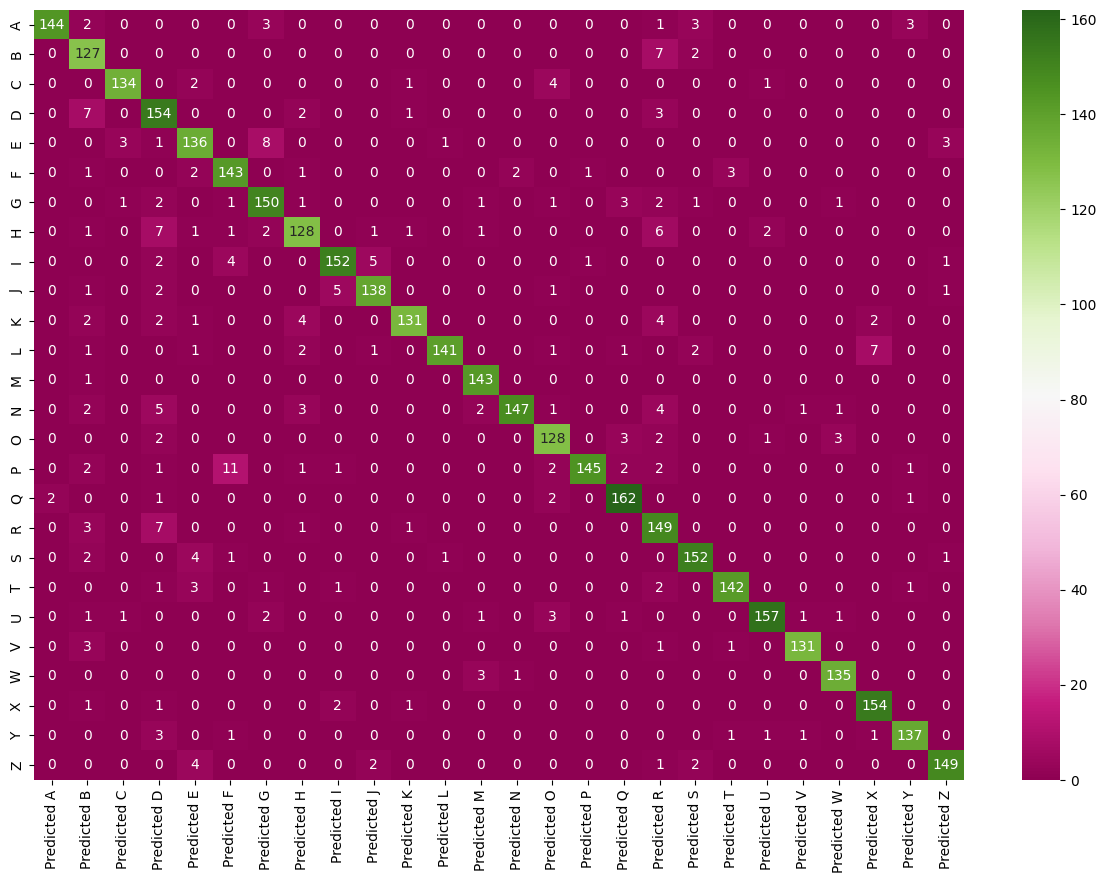

In [56]:
plt.figure(figsize=(15,10))

sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = "PiYG")
plt.show()